In [26]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('E:\PTDL\GDPlist.csv', encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [6]:
print( stats.ttest_1samp(df['GDP (millions of US$)'], 500000))

Ttest_1sampResult(statistic=0.3757438669518338, pvalue=0.7077493494055246)


In [7]:
'''
Giá trị pvalue >5% nên không đủ cơ sở để để bác bỏ giả thuyết không

Kết luận: Với mức ý nghĩa 5% có thể nhận định trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm
'''

'\nGiá trị pvalue >5% nên không đủ cơ sở để để bác bỏ giả thuyết không\n\nKết luận: Với mức ý nghĩa 5% có thể nhận định trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm\n'

In [18]:
# GDP trung bình ở các quốc gia ở châu Âu cao hơn châu Á không

# GDP cua Chau Au, Chau A
GDP_Eu = df[df['Continent'] == 'Europe']
GDP_As = df[df['Continent'] == 'Asia']

In [19]:
df_GDP_Eu = GDP_Eu['GDP (millions of US$)'].values.tolist()
df_GDP_As = GDP_As['GDP (millions of US$)'].values.tolist()

In [22]:
data = pd.concat([GDP_Eu, GDP_As])
data

,Country,Continent,GDP (millions of US$)
1,Albania,Europe,12847
6,Austria,Europe,419243
7,Azerbaijan,Europe,62321
10,Belarus,Europe,55483
11,Belgium,Europe,513396
...,...,...,...
112,Turkey,Asia,778089
113,Turkmenistan,Asia,25742
116,United Arab Emirates,Asia,360136
120,Uzbekistan,Asia,45353


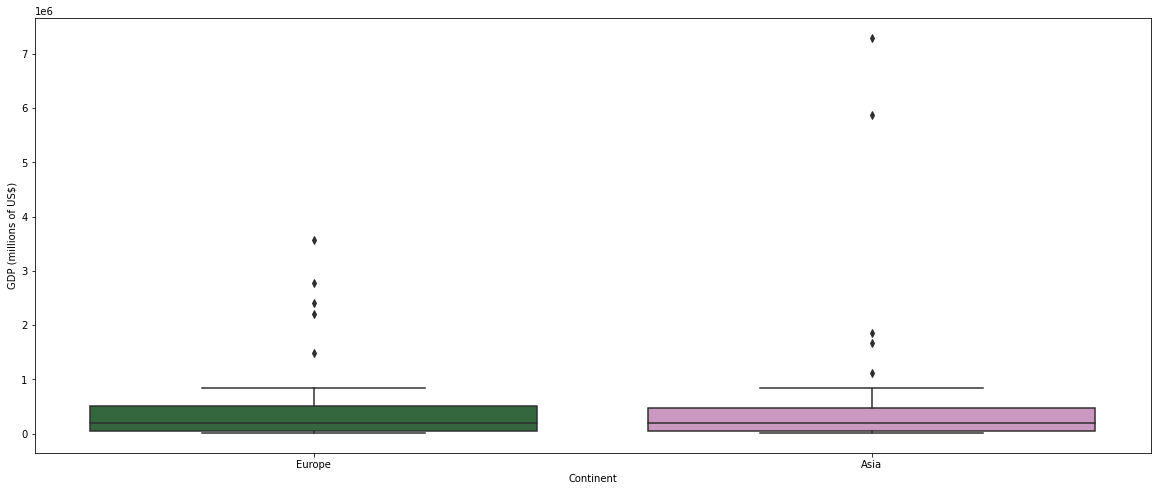

In [24]:
plt.figure(figsize=(20,8))

sns.boxplot(x=data.Continent, y=data['GDP (millions of US$)'], palette=("cubehelix"))
plt.show()

In [32]:
r = stats.ttest_ind(df_GDP_Eu, df_GDP_As, equal_var=False)
print(r)

Ttest_indResult(statistic=-0.5546583491057376, pvalue=0.5813877404597693)


In [34]:
'''
Giá trị pvalue >5% nên không đủ cơ sở để để bác bỏ giả thuyết không

Kết luận: Với mức ý nghĩa 5% có thể nhận định GDP trung bình ở các quốc gia ở châu Âu không cao hơn châu Á
'''

'\nGiá trị pvalue >5% nên không đủ cơ sở để để bác bỏ giả thuyết không\n\nKết luận: Với mức ý nghĩa 5% có thể nhận định GDP trung bình ở các quốc gia ở châu Âu không cao hơn châu Á\n'

In [42]:
# GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau
GDP_America = df[df['Continent'].str.contains('America', case=False, na=False)]

In [51]:
GDP_America['Continent'] = GDP_America['Continent'].str.replace('South America', 'America')
GDP_America['Continent'] = GDP_America['Continent'].str.replace('North America', 'America')


C:\Users\DELL\AppData\Local\Temp\ipykernel_14116\1938029138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_America['Continent'] = GDP_America['Continent'].str.replace('South America', 'America')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14116\1938029138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_America['Continent'] = GDP_America['Continent'].str.replace('North America', 'America')


In [52]:
GDP_America['Continent']

4      America
15     America
21     America
22     America
24     America
27     America
33     America
34     America
36     America
47     America
48     America
59     America
73     America
84     America
86     America
87     America
110    America
118    America
119    America
121    America
Name: Continent, dtype: object

In [53]:
df_GDP_America = GDP_America['GDP (millions of US$)'].values.tolist()

In [54]:
data_Eu_Am = pd.concat([GDP_Eu, GDP_America])
data_Eu_Am

,Country,Continent,GDP (millions of US$)
1,Albania,Europe,12847
6,Austria,Europe,419243
7,Azerbaijan,Europe,62321
10,Belarus,Europe,55483
11,Belgium,Europe,513396
13,Bosnia and Herzegovina,Europe,17965
17,Bulgaria,Europe,53514
29,Croatia,Europe,63842
30,Cyprus,Europe,24949
31,Czech Republic,Europe,215265


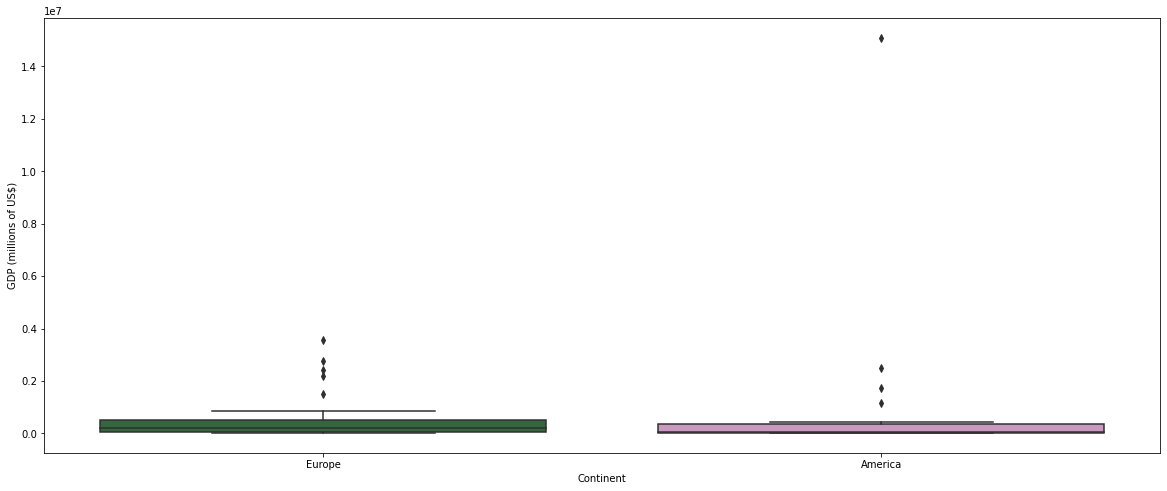

In [55]:
plt.figure(figsize=(20,8))

sns.boxplot(x=data_Eu_Am.Continent, y=data_Eu_Am['GDP (millions of US$)'], palette=("cubehelix"))
plt.show()

In [57]:
print(stats.ttest_ind(df_GDP_Eu, df_GDP_America, equal_var=False))


Ttest_indResult(statistic=-0.7882914270473153, pvalue=0.4396139393183093)


TypeError: list indices must be integers or slices, not str